In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/AAPL.csv')

In [5]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [6]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [7]:
# we consider the market closing rates as the on;y feature to predict the feature prices.

In [8]:
data = df.reset_index()['close']

In [9]:
data

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

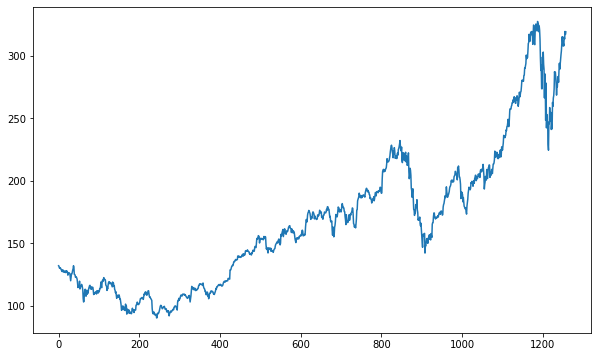

In [12]:
plt.figure(figsize= (10,6))
plt.plot(data)

In [13]:
# since LSTM are sensitive to the scale of the data , we bring all the values between 0 to 1 using MinMaxScaler

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1))
data = sc.fit_transform(np.array(data).reshape(-1,1))

In [15]:
data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [16]:
#Here, we cant split the data into train and test using train test split beacause the prediction of today depends on the previous days
# and the train test split splits the dta randomly.

In [17]:
#therefore we split the dtaa in the other way.
train_size = int(len(data)*0.65)
test_size = len(data)-train_size

In [18]:
train_size

817

In [19]:
test_size

441

In [20]:
train_data = data[0:train_size]

In [21]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [24]:
test_data = data[train_size:len(df):1]

In [25]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [26]:
# the prediction of tomorrow depends on the closing values of the past days. so we can consider how many past days .
#lets consider the past 150 days as the reference to predict the next day data

In [31]:
import numpy as np

In [32]:
def create_dataset(dataset,time_step =1):
  Xdata, Ydata = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    Xdata.append(a)
    Ydata.append(dataset[i+time_step,0])
  return np.array(Xdata),np.array(Ydata)

In [33]:
time_step = 150
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [34]:
X_train.shape

(666, 150)

In [36]:
y_train.shape

(666,)

In [37]:
X_test.shape

(290, 150)

In [39]:
y_test.shape

(290,)

In [40]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [43]:
X_train.shape

(666, 150, 1)

In [45]:
X_train.shape[0]

666

In [46]:
#lets create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model = Sequential()
model.add(LSTM(50,return_sequences =True,input_shape = (150,1)))
model.add(LSTM(50,return_sequences =True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer ='adam')

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=100,verbose=1,batch_size=64)

Epoch 1/100
11/11 [==============================] - 9s 405ms/step - loss: 0.0195 - val_loss: 0.0470
Epoch 2/100
11/11 [==============================] - 3s 299ms/step - loss: 0.0039 - val_loss: 0.0052
Epoch 3/100
11/11 [==============================] - 3s 291ms/step - loss: 0.0016 - val_loss: 0.0086
Epoch 4/100
11/11 [==============================] - 3s 289ms/step - loss: 7.9484e-04 - val_loss: 0.0051
Epoch 5/100
11/11 [==============================] - 3s 286ms/step - loss: 7.5188e-04 - val_loss: 0.0047
Epoch 6/100
11/11 [==============================] - 3s 289ms/step - loss: 6.4755e-04 - val_loss: 0.0048
Epoch 7/100
11/11 [==============================] - 3s 289ms/step - loss: 6.5432e-04 - val_loss: 0.0044
Epoch 8/100
11/11 [==============================] - 3s 286ms/step - loss: 6.4015e-04 - val_loss: 0.0048
Epoch 9/100
11/11 [==============================] - 3s 290ms/step - loss: 6.1722e-04 - val_loss: 0.0052
Epoch 10/100
11/11 [==============================] - 3s 297ms/step

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [53]:
# initially we scaled the model . now we perform inverse scaling to get the actual predictions.

In [54]:
train_pred = sc.inverse_transform(train_predict)

In [55]:
test_pred = sc.inverse_transform(test_predict)

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
# Lets check the error for the training data only

In [58]:
mean_squared_error(y_train,train_pred)

20523.84965166617

In [59]:
import math
math.sqrt(mean_squared_error(y_train,train_pred))

143.26147301932286

In [60]:
math.sqrt(mean_squared_error(y_test,test_pred))

245.77166800686476

In [61]:
#Lets plot the result on the graph

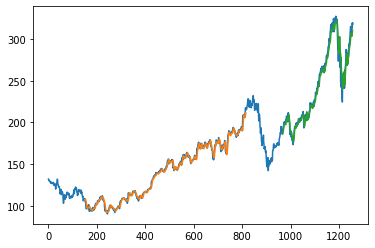

<Figure size 2250x900 with 0 Axes>

In [66]:
#shifting tarin predictors for plotting
time_stamp =150
train_pred_plot = np.empty_like(data)
train_pred_plot[:, :] = np.nan
train_pred_plot[time_stamp:len(train_pred)+time_stamp, :] = train_pred
#shifting test predictions for plotting
test_pred_plot = np.empty_like(data)
test_pred_plot[:, :]=np.nan
test_pred_plot[len(train_pred)+(time_stamp*2)+1:len(data)-1, :] = test_pred
#plotting the base line and the predictions
plt.plot(sc.inverse_transform(data))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.figure(figsize = (15,6),dpi =150)
plt.show()


In [67]:
#here, the orange curve is for the train data, green is for the test dat and the blue is for the original curve.

In [68]:
len(test_data)

441

In [70]:
x_input=test_data[291:].reshape(1,-1)
x_input.shape

(1, 150)

In [71]:
temp_input=list(x_input)


In [74]:
temp_input

[0.6166934053871487,
 0.634003208646458,
 0.6316811618677702,
 0.6452756902811789,
 0.6469644515747701,
 0.6596301612767037,
 0.6700582622646292,
 0.6457400996369165,
 0.6456134425398972,
 0.6688339103267753,
 0.6986405471586592,
 0.7057333445917422,
 0.7041712403951703,
 0.7046356497509079,
 0.7138816178333194,
 0.7168791691294436,
 0.7255762897914382,
 0.7245630330152835,
 0.7351600101325679,
 0.7274339272143884,
 0.7406062653043994,
 0.7462636156379299,
 0.7428438740184078,
 0.7297559739930761,
 0.7247741281769824,
 0.7238030904331674,
 0.7431816262771258,
 0.7344000675504521,
 0.7493878240310732,
 0.7468969011230264,
 0.7338512201300349,
 0.713966055897999,
 0.7236342143038084,
 0.7398463227222833,
 0.7615046863125898,
 0.7455036730558138,
 0.7520898421008193,
 0.7617580005066285,
 0.7646711137380733,
 0.7802499366714515,
 0.8001351009034876,
 0.8024571476821754,
 0.7996284725154101,
 0.8008106054209239,
 0.7983619015452168,
 0.8176137802921559,
 0.8187536941653297,
 0.842565228404

In [72]:
temp_input[0]

0.6166934053871487

In [73]:
temp_input[1]

0.634003208646458

In [77]:
len(temp_input)

150

In [76]:
# now we try to predict the output for the next 30 days

In [78]:
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):
    
    if(len(temp_input)>150):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.942589]
151
1 day input [0.63400321 0.63168116 0.64527569 0.64696445 0.65963016 0.67005826
 0.6457401  0.64561344 0.66883391 0.69864055 0.70573334 0.70417124
 0.70463565 0.71388162 0.71687917 0.72557629 0.72456303 0.73516001
 0.72743393 0.74060627 0.74626362 0.74284387 0.72975597 0.72477413
 0.72380309 0.74318163 0.73440007 0.74938782 0.7468969  0.73385122
 0.71396606 0.72363421 0.73984632 0.76150469 0.74550367 0.75208984
 0.761758   0.76467111 0.78024994 0.8001351  0.80245715 0.79962847
 0.80081061 0.7983619  0.81761378 0.81875369 0.84256523 0.84210082
 0.84936249 0.85835515 0.8866419  0.87431394 0.88431985 0.87836697
 0.8986321  0.92582116 0.92877649 0.95676771 0.93869797 0.93304061
 0.94950604 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728
 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0

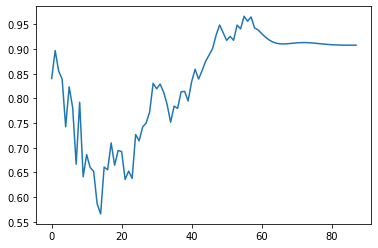

In [79]:
df1=data.tolist()
df1.extend(lst_output)
plt.plot(df1[1200:])

In [82]:
df1=sc.inverse_transform(df1).tolist()

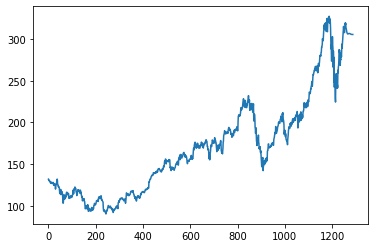

In [83]:
plt.plot(df1)